In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler ,LabelEncoder,OneHotEncoder
import seaborn as sns
from sklearn.impute import SimpleImputer 
data = pd.read_csv('Exercise-CarData.csv')

In [27]:
data.head()

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


In [28]:
data.describe()

,Unnamed: 0,Price,Age,MetColor,Automatic,CC,Weight
count,1436.000000,1436.000000,1336.000000,1286.000000,1436.000000,1436.000000,1436.00000
mean,717.500000,10730.824513,55.672156,0.674961,0.055710,1566.827994,1072.45961
std,414.681806,3626.964585,18.589804,0.468572,0.229441,187.182436,52.64112
min,0.000000,4350.000000,1.000000,0.000000,0.000000,1300.000000,1000.00000
25%,358.750000,8450.000000,43.000000,0.000000,0.000000,1400.000000,1040.00000
50%,717.500000,9900.000000,60.000000,1.000000,0.000000,1600.000000,1070.00000
75%,1076.250000,11950.000000,70.000000,1.000000,0.000000,1600.000000,1085.00000
max,1435.000000,32500.000000,80.000000,1.000000,1.000000,2000.000000,1615.00000


In [29]:
len(data)

1436

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1336 non-null   float64
 3   KM          1436 non-null   object 
 4   FuelType    1336 non-null   object 
 5   HP          1436 non-null   object 
 6   MetColor    1286 non-null   float64
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   object 
 10  Weight      1436 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 123.5+ KB


In [ ]:
Data Preprocessing

In [31]:
data = data.drop(columns='Unnamed: 0',axis=True)
data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


In [ ]:
Seprate Input and Output attributes

In [32]:
X = data.iloc[1:,:]
y = data.Price
print("X : \n",X)
print("\n\ny : \n",y)

X : 
       Price   Age     KM FuelType   HP  MetColor  Automatic    CC Doors  \
1     13750  23.0  72937   Diesel   90       1.0          0  2000     3   
2     13950  24.0  41711   Diesel   90       NaN          0  2000     3   
3     14950  26.0  48000   Diesel   90       0.0          0  2000     3   
4     13750  30.0  38500   Diesel   90       0.0          0  2000     3   
5     12950  32.0  61000   Diesel   90       0.0          0  2000     3   
...     ...   ...    ...      ...  ...       ...        ...   ...   ...   
1431   7500   NaN  20544   Petrol   86       1.0          0  1300     3   
1432  10845  72.0     ??   Petrol   86       0.0          0  1300     3   
1433   8500   NaN  17016   Petrol   86       0.0          0  1300     3   
1434   7250  70.0     ??      NaN   86       1.0          0  1300     3   
1435   6950  76.0      1   Petrol  110       0.0          0  1600     5   

      Weight  
1       1165  
2       1165  
3       1165  
4       1170  
5       1170  
...

In [ ]:
Data Cleaning

In [33]:
X.dropna(axis=0,how='all',inplace=True)
print("\nNew Data :",X)


New Data :       Price   Age     KM FuelType   HP  MetColor  Automatic    CC Doors  \
1     13750  23.0  72937   Diesel   90       1.0          0  2000     3   
2     13950  24.0  41711   Diesel   90       NaN          0  2000     3   
3     14950  26.0  48000   Diesel   90       0.0          0  2000     3   
4     13750  30.0  38500   Diesel   90       0.0          0  2000     3   
5     12950  32.0  61000   Diesel   90       0.0          0  2000     3   
...     ...   ...    ...      ...  ...       ...        ...   ...   ...   
1431   7500   NaN  20544   Petrol   86       1.0          0  1300     3   
1432  10845  72.0     ??   Petrol   86       0.0          0  1300     3   
1433   8500   NaN  17016   Petrol   86       0.0          0  1300     3   
1434   7250  70.0     ??      NaN   86       1.0          0  1300     3   
1435   6950  76.0      1   Petrol  110       0.0          0  1600     5   

      Weight  
1       1165  
2       1165  
3       1165  
4       1170  
5       1170

C:\Users\manan\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [34]:
X.isnull().sum(axis=0)

Price          0
Age          100
KM             0
FuelType     100
HP             0
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [35]:
y.isnull().sum(axis=0)

0

In [38]:
X_new = X

In [39]:
X_new['Age'] = X_new['Age'].fillna(X_new['Age'].mean())

C:\Users\manan\AppData\Local\Temp/ipykernel_5580/1477052606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new['Age'] = X_new['Age'].fillna(X_new['Age'].mean())


In [40]:
X_new.MetColor.value_counts()

1.0    867
0.0    418
Name: MetColor, dtype: int64

In [41]:
X_new['MetColor'] = X_new['MetColor'].fillna(value=1)

C:\Users\manan\AppData\Local\Temp/ipykernel_5580/207371779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new['MetColor'] = X_new['MetColor'].fillna(value=1)


In [42]:
X_new.isnull().sum(axis=0)

Price          0
Age            0
KM             0
FuelType     100
HP             0
MetColor       0
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [ ]:
Data Encoding

In [43]:
X_new.Doors.value_counts()

5       673
3       621
4       137
2         2
four      1
five      1
Name: Doors, dtype: int64

In [44]:
X_new['Doors'] = X_new['Doors'].replace({"four":'4',"five":'5'})

C:\Users\manan\AppData\Local\Temp/ipykernel_5580/864382989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_new['Doors'] = X_new['Doors'].replace({"four":'4',"five":'5'})


In [45]:
dummy = pd.get_dummies(X_new['FuelType'])
print("\n\nDummy :\n",dummy)
X_new = X_new.drop(['FuelType'],axis=1)
X_new = pd.concat([X_new,dummy],axis=1)



Dummy :
       CNG  Diesel  Petrol
1       0       1       0
2       0       1       0
3       0       1       0
4       0       1       0
5       0       1       0
...   ...     ...     ...
1431    0       0       1
1432    0       0       1
1433    0       0       1
1434    0       0       0
1435    0       0       1

[1435 rows x 3 columns]


In [46]:
X_new.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,CNG,Diesel,Petrol
1,13750,23.0,72937,90,1.0,0,2000,3,1165,0,1,0
2,13950,24.0,41711,90,1.0,0,2000,3,1165,0,1,0
3,14950,26.0,48000,90,0.0,0,2000,3,1165,0,1,0
4,13750,30.0,38500,90,0.0,0,2000,3,1170,0,1,0
5,12950,32.0,61000,90,0.0,0,2000,3,1170,0,1,0


In [47]:
y = X_new['Price']
X_new = X_new.drop(['Price'],axis=1)

In [48]:
X_new.head()

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,CNG,Diesel,Petrol
1,23.0,72937,90,1.0,0,2000,3,1165,0,1,0
2,24.0,41711,90,1.0,0,2000,3,1165,0,1,0
3,26.0,48000,90,0.0,0,2000,3,1165,0,1,0
4,30.0,38500,90,0.0,0,2000,3,1170,0,1,0
5,32.0,61000,90,0.0,0,2000,3,1170,0,1,0


In [49]:
y.head()

1    13750
2    13950
3    14950
4    13750
5    12950
Name: Price, dtype: int64

In [ ]:
Feature Selection

In [50]:
corr_data = X_new.corr()
corr_data

,Age,MetColor,Automatic,CC,Weight,CNG,Diesel,Petrol
Age,1.000000,-0.084027,0.030669,-0.113667,-0.440815,0.006598,-0.065177,0.059506
MetColor,-0.084027,1.000000,-0.011343,0.031137,0.045885,0.005570,-0.012011,-0.012591
Automatic,0.030669,-0.011343,1.000000,-0.069060,0.057609,-0.024973,-0.080837,0.058397
CC,-0.113667,0.031137,-0.069060,1.000000,0.650529,0.018341,0.729102,-0.560408
Weight,-0.440815,0.045885,0.057609,0.650529,1.000000,0.051870,0.514966,-0.424027
CNG,0.006598,0.005570,-0.024973,0.018341,0.051870,1.000000,-0.034193,-0.219523
Diesel,-0.065177,-0.012011,-0.080837,0.729102,0.514966,-0.034193,1.000000,-0.710584
Petrol,0.059506,-0.012591,0.058397,-0.560408,-0.424027,-0.219523,-0.710584,1.000000


<AxesSubplot:>

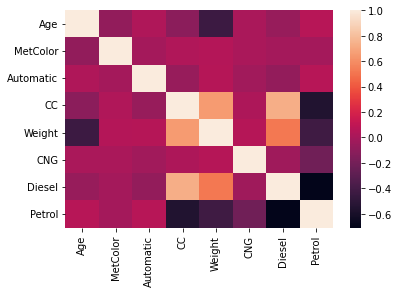

In [51]:
sns.heatmap(corr_data)

In [ ]:
Here we can see that correlation between CC and Weight is more as compared to correlation with other.